In [0]:
import numpy as np  
import pandas as pd
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [0]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [0]:
import numpy as np

## Initializing W,B,eta0 and alpha

In [12]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)
N

37500

### Computing Log-loss

In [0]:
import math
# you can free to change all these codes/structure
def compute_log_loss(y_train,pred):
    sum1 = 0
    for i in range(len(pred)):
    
        sum1 += ((y_train[i] * math.log(pred[i])) + ((1-y_train[i]) * math.log((1-pred[i]))))
    
    loss = (-sum1/len(y_train))
    return loss

### Sigmoid and predict functions

In [14]:
def sigmoid(x,w,b):
    return (1/(1+np.exp(-(np.dot(x,w)+b))))

def predict(X_train,w,b):
    pred = []

    for i in range(len(X_train)):
         pred.append(sigmoid(X_train[i],w,b))
    
    return pred

train_loss = []
test_loss  = []

#print(pred[:5])
train_pred = predict(X_train,w,b)
test_pred = predict(X_test,w,b)

#Computing log-loss        
train_loss.append(compute_log_loss(y_train,train_pred))
test_loss.append(compute_log_loss(y_test,test_pred))
print(train_loss[0])
print(test_loss[0])




0.6931471805594285
0.6931471805600672


### SGD with train and test loss

In [15]:
import random

for epoch in (range(100)):
    for i in range(N):
        batch = random.randrange(1,N)
        
        w = (( 1 - ( (alpha*eta0)/N) ) * w ) + ( (alpha*X_train[batch]) * ( y_train[batch] - sigmoid( X_train[batch],w, b) ) )
        #w = (1 - ( (alpha * eta0)/N ) * w ) + ( ( alpha * X_train[batch] ) * ( y_train[batch] - sigmoid(X_train[batch],w,b ) ) )
        #b = b + (alpha * (y_train[batch] - sigmoid(X_train,w,b))) 
        b = (b - ( alpha * ( -(y_train[batch]) + sigmoid(X_train[batch],w, b) ) ))

    
    y_train_ep = predict(X_train,w,b)
    y_test_ep = predict(X_test,w,b)
    
    
    train_loss.append(compute_log_loss(y_train,y_train_ep))
    test_loss.append(compute_log_loss(y_test,y_test_ep))
    
    
    print("Epoch",epoch,"train_loss",train_loss[-1:],'test_loss',test_loss[-1:])
        
        
        



Epoch 0 train_loss [0.4037381695280155] test_loss [0.4051409460739654]
Epoch 1 train_loss [0.3881853608997544] test_loss [0.3898325942293472]
Epoch 2 train_loss [0.3829884680624984] test_loss [0.3850343141489612]
Epoch 3 train_loss [0.3810364322337181] test_loss [0.3829650524208779]
Epoch 4 train_loss [0.3793307474020105] test_loss [0.3811837756963011]
Epoch 5 train_loss [0.37899058749291276] test_loss [0.38093730513735213]
Epoch 6 train_loss [0.37860451654347943] test_loss [0.3809161630106351]
Epoch 7 train_loss [0.37859248967793074] test_loss [0.3806523284867069]
Epoch 8 train_loss [0.37839479771533124] test_loss [0.38062307300682996]
Epoch 9 train_loss [0.3785997381435557] test_loss [0.3801598326075643]
Epoch 10 train_loss [0.37875586516661724] test_loss [0.3808460189708544]
Epoch 11 train_loss [0.3785334950483176] test_loss [0.38043706353596246]
Epoch 12 train_loss [0.378319311341773] test_loss [0.38046905269524517]
Epoch 13 train_loss [0.37849586907479216] test_loss [0.38106104382

### Plot of train-loss and test-loss

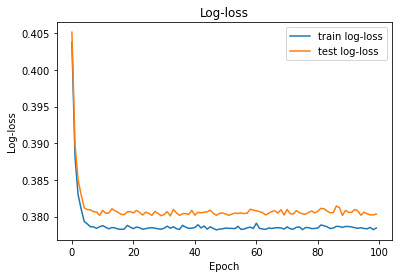

In [16]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(9,6))

plt.plot(train_loss[1:], label="train log-loss")
plt.plot(test_loss[1:], label="test log-loss")

plt.xlabel("Epoch")
plt.ylabel("Log-loss")
plt.legend()
plt.title("Log-loss")

plt.show()


### Weight and intercept 

In [17]:
print("Weight vector(W) :",w)
print('Intercept(B) :',b)

Weight vector(W) : [-0.43026846  0.19244311 -0.14315103  0.34086735 -0.22428848  0.56679028
 -0.44654246 -0.09243658  0.22266273  0.17870868  0.20592653 -0.00220059
 -0.0813303   0.33423687  0.03268197]
Intercept(B) : -0.891685729814871


### Diff btw skcit learn and custom implemented weights

In [18]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-0.00690154,  0.00696746,  0.00543933, -0.00057672, -0.01610178,
          0.0066245 ,  0.00588236,  0.00165155,  0.01338953, -0.00213258,
          0.00887463, -0.00641975, -0.0017266 , -0.00429115,  0.01001476]]),
 array([-0.03854743]))

### Calculating accuracy

In [19]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if 1/(1+np.exp(-(np.dot(X[i],w)+b))) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

print("Train accuracy : ",1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print("Test accuracy :",1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

Train accuracy :  0.9541866666666666
Test accuracy : 0.95256
